In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df= pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Class\Credit Risk\risk_analytics_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df_rev=pd.DataFrame(df)

In [6]:
df_rev.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
colname=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]

for x in colname:
    df_rev[x].fillna(df_rev[x].mode()[0],inplace=True)

In [8]:
df_rev.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
import statistics
statistics.mode(df_rev['Credit_History'])

1.0

In [10]:
df_rev['Credit_History'].fillna(value=1,inplace = True)
df_rev['LoanAmount'].fillna(round(df_rev['LoanAmount'].mean(),0), inplace=True)

In [11]:
df_rev.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df_rev.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163108,-0.103864,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116605,0.565621,-0.046531,-0.018615
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187863,-0.059383,0.011134
LoanAmount,0.163108,0.565621,0.187863,1.000000,0.036486,-0.001412
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036486,1.000000,-0.004705
Credit_History,-0.040160,-0.018615,0.011134,-0.001412,-0.004705,1.000000


In [13]:
#Dropping variables manually (Domain knowledge based)

In [14]:
df_rev.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1, inplace=True)
df_rev.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,0.0,5849,0.0,146.0,360.0,1.0,Y
1,LP001003,1.0,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,0.0,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,0.0,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,0.0,6000,0.0,141.0,360.0,1.0,Y


In [15]:
df_rev.shape

(614, 8)

In [16]:
colname =[]
for j in df_rev.columns[:]:
    if df_rev[j].dtype == 'object':
        colname.append(j)
colname

['Loan_ID', 'Loan_Status']

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df_rev[j] = le.fit_transform(df_rev[j].astype(str))

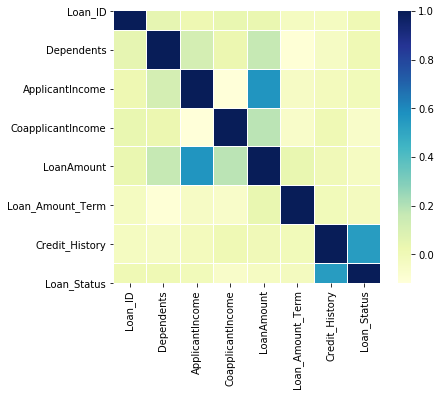

In [18]:
corrmat = df_rev.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [19]:
X = df_rev.values[:,:-1]
Y = df_rev.values[:,-1]
Y = Y.astype('int')

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X)

[[-1.72923217 -0.73780632  0.07299082 ... -0.00473263  0.2732313
   0.41173269]
 [-1.7235903   0.25346957 -0.13441195 ... -0.21909735  0.2732313
   0.41173269]
 [-1.71794844 -0.73780632 -0.39374734 ... -0.95746473  0.2732313
   0.41173269]
 ...
 [ 1.71794844  0.25346957  0.43717437 ...  1.26954655  0.2732313
   0.41173269]
 [ 1.7235903   1.24474546  0.35706382 ...  0.48354257  0.2732313
   0.41173269]
 [ 1.72923217 -0.73780632 -0.13441195 ... -0.15955159  0.2732313
  -2.42876026]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

# Logistic Regression (basic model)

In [22]:
#Building the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() # creating the model object
#Fitting the training data in the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[ 0.03704495  0.15058786  0.11183144 -0.17370844 -0.07110125 -0.03612612
   1.31652401]]
[0.80244324]


In [23]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[ 16  36]
 [  1 132]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185

Accuracy of the model: 0.8


0.6500867553499132
[0.         0.69230769 1.        ]
[0.        0.9924812 1.       ]


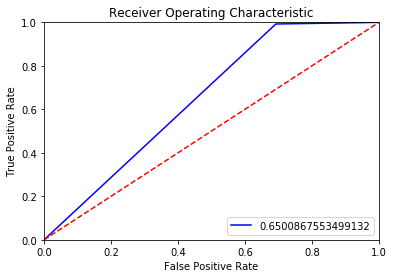

In [24]:
from sklearn import metrics
fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# adjusting threshold (tuning technique) - Logistic Regression

In [25]:
#Store the predicted probabilities
Y_pred_prob = classifier.predict_proba(X_test)
print(Y_pred_prob)

[[0.24205758 0.75794242]
 [0.24654034 0.75345966]
 [0.2452471  0.7547529 ]
 [0.28313666 0.71686334]
 [0.2306953  0.7693047 ]
 [0.20958705 0.79041295]
 [0.88960495 0.11039505]
 [0.22518989 0.77481011]
 [0.19457839 0.80542161]
 [0.19768341 0.80231659]
 [0.22498645 0.77501355]
 [0.20476856 0.79523144]
 [0.16924005 0.83075995]
 [0.20793716 0.79206284]
 [0.91763858 0.08236142]
 [0.23190643 0.76809357]
 [0.19365471 0.80634529]
 [0.18362961 0.81637039]
 [0.24698729 0.75301271]
 [0.21860075 0.78139925]
 [0.23527744 0.76472256]
 [0.16154819 0.83845181]
 [0.23631258 0.76368742]
 [0.8717743  0.1282257 ]
 [0.18131916 0.81868084]
 [0.23040433 0.76959567]
 [0.19332913 0.80667087]
 [0.14305767 0.85694233]
 [0.22804232 0.77195768]
 [0.23749039 0.76250961]
 [0.22672775 0.77327225]
 [0.21787123 0.78212877]
 [0.16712403 0.83287597]
 [0.91323914 0.08676086]
 [0.27277918 0.72722082]
 [0.25863187 0.74136813]
 [0.27147071 0.72852929]
 [0.21187828 0.78812172]
 [0.20719405 0.79280595]
 [0.16717332 0.83282668]


In [26]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , Type 2 error:",
       cfm[1,0]," , Type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.01 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.02 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.03 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.04 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.05 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.06 : 52  , Type 2 error: 0  , Type 1 error: 52
Errors at threshold  0.07 : 50  , Type 2 error: 0  , Type 1 error: 50
Errors at threshold  0.08 : 45  , Type 2 error: 0  , Type 1 error: 45
Errors at threshold  0.09 : 45  , Type 2 error: 1  , Type 1 error: 44
Errors at threshold  0.1 : 41  , Type 2 error: 1  , Type 1 error: 40
Errors at threshold  0.11 : 41  , Type 2 error: 1  , Type 1 error: 40
Errors at threshold  0.12 : 39  , Type 2 error: 1  , Type 1 error: 38
Errors at threshold  0.13 : 37  , Type 2 error: 1  , Type 1 error: 36
Errors at threshold  0

In [27]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.73:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)

[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [28]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[ 18  34]
 [  8 125]]
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.35      0.46        52
           1       0.79      0.94      0.86       133

    accuracy                           0.77       185
   macro avg       0.74      0.64      0.66       185
weighted avg       0.76      0.77      0.75       185

Accuracy of the model: 0.772972972972973


0.6500867553499132
[0.         0.69230769 1.        ]
[0.        0.9924812 1.       ]


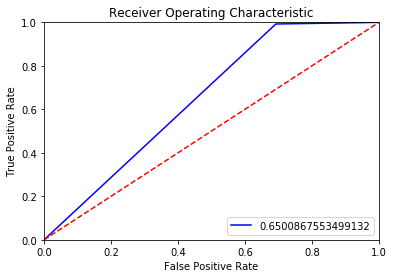

In [29]:
from sklearn import metrics
fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# cross-validation (tuning technique) - Logistic Regression

In [30]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=8)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=8, random_state=None, shuffle=False)
[0.83333333 0.85185185 0.94444444 0.7962963  0.7962963  0.71698113
 0.77358491 0.79245283]
0.8131551362683438


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_1)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred_1))

acc = accuracy_score(Y_test,Y_pred_1)
print("Accuracy of the model : ",acc)

[[ 16  36]
 [  1 132]]
Classification report : 
              precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185

Accuracy of the model :  0.8


# Decision Tree (Base Model)

In [32]:
# Predicting using Decision_Tree_classifier
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state = 15, min_samples_leaf=5,max_depth=10)

#fit the model on the data and predict the value
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [33]:
Y_pred = model_DT.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 0), (1, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 1), (1, 1), (1, 1), (1, 1),

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report : ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model : ",acc)

[[ 20  32]
 [ 18 115]]
Classification report : 
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        52
           1       0.78      0.86      0.82       133

    accuracy                           0.73       185
   macro avg       0.65      0.62      0.63       185
weighted avg       0.71      0.73      0.72       185

Accuracy of the model :  0.7297297297297297


# SVM [Support Vector Classification] (Base model)

In [35]:
from sklearn import svm

svc_model = svm.SVC(kernel="rbf",C=10.0,gamma=0.001) 
svc_model.fit(X_train,Y_train)
Y_pred = svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
svc_model.score(X_train,Y_train)

0.8158508158508159

# cross-validation on SVM

In [37]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1)
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean')
#classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001)
#classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.88372093 0.81395349 0.86046512 0.86046512 0.8372093  0.81395349
 0.74418605 0.6744186  0.8372093  0.76190476]
0.8087486157253598


In [38]:
# Best Fit Model is SVM (Base model)